<a href="https://colab.research.google.com/github/IITH-STP-ASSIGNMENTS/Basics-of-Linear-Algebra/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [11]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [12]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [13]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

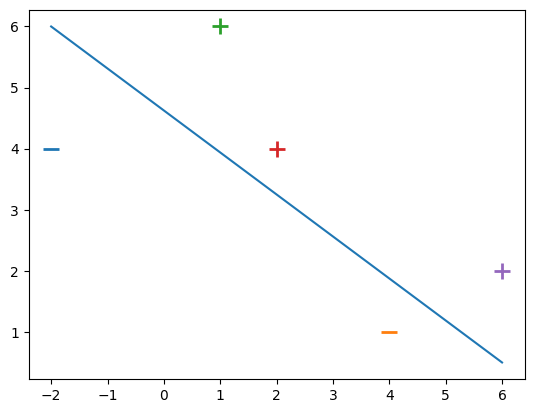

In [14]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

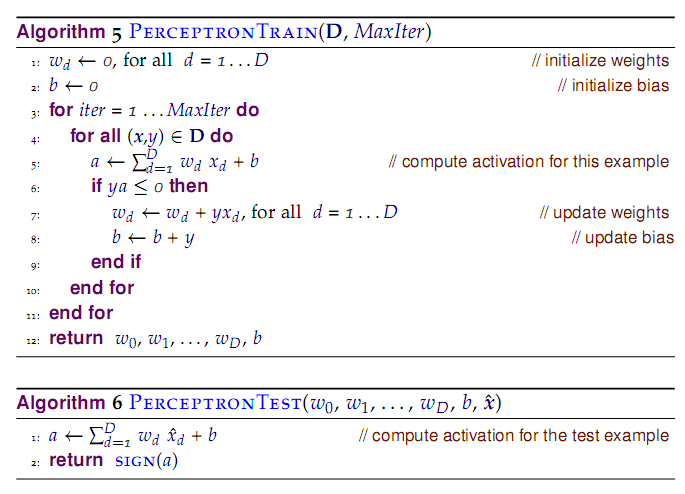

The algorithm is shown in the above image.

In [19]:
def perceptron_algo(X, Y, eta=1, epochs=10):
    w = np.zeros(len(X[0]))


    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [20]:
def perceptron_algo_plot(X, Y, eta=1, n=30):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))

    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

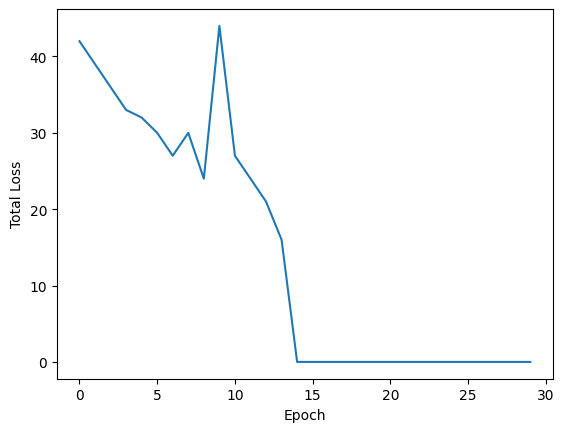

In [17]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

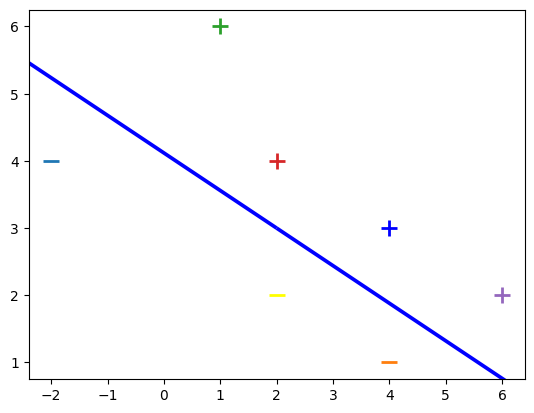

In [18]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



Download complete.
Running perceptron on Sonar dataset...


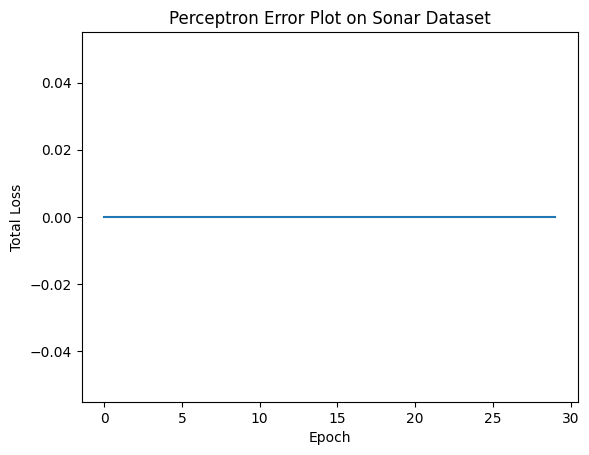


Experimenting with different learning rates on Sonar dataset:


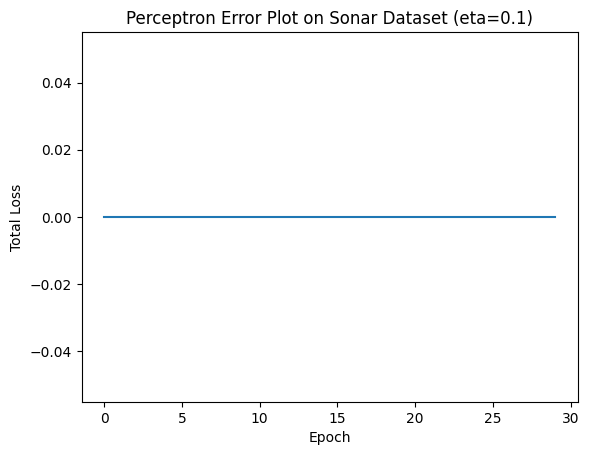

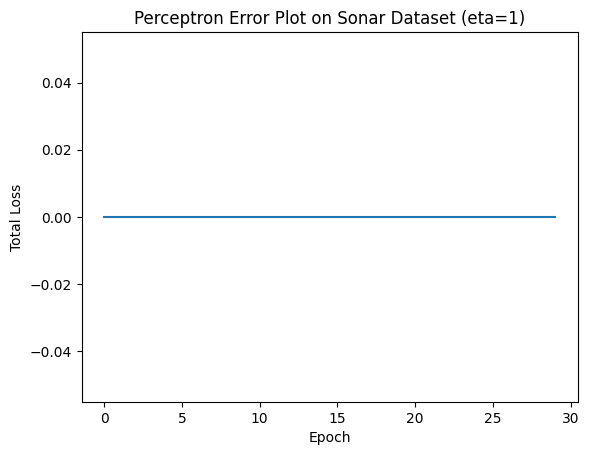

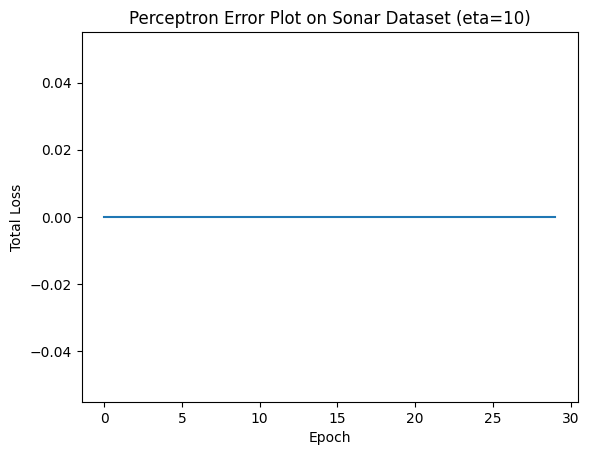

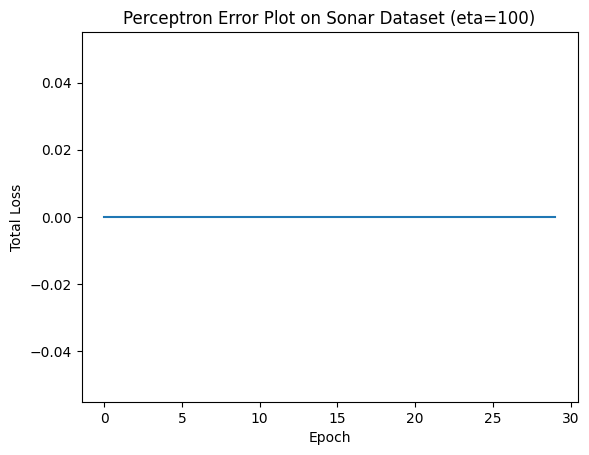


Running perceptron on a non-linearly separable dataset:


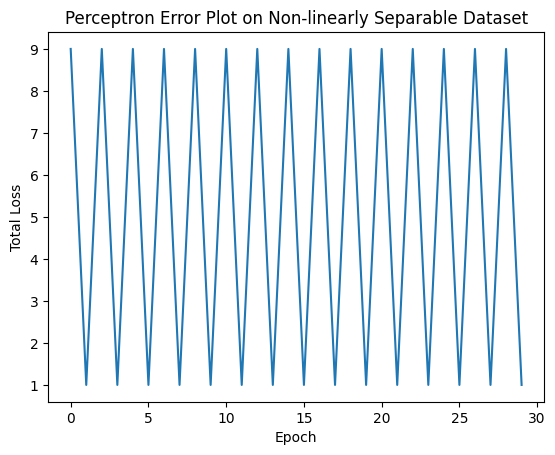


Observation on the non-linearly separable dataset:
The perceptron algorithm does not converge on a non-linearly separable dataset.
The error plot oscillates and does not reach zero.


In [21]:
# 1. Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
#    We will use the Sonar dataset. You might need to download it first.
try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve
import os

sonar_dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
sonar_dataset_path = 'sonar.all-data'

if not os.path.exists(sonar_dataset_path):
    print("Downloading Sonar dataset...")
    urlretrieve(sonar_dataset_url, sonar_dataset_path)
    print("Download complete.")

sonar_data = np.loadtxt(sonar_dataset_path, delimiter=',', converters={60: lambda x: 1.0 if x == b'R' else -1.0})

X_sonar = sonar_data[:, :-1]
y_sonar = sonar_data[:, -1]

print("Running perceptron on Sonar dataset...")
w_sonar = perceptron_algo_plot(X_sonar, y_sonar)
plt.title("Perceptron Error Plot on Sonar Dataset")
plt.show()

# 2. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
print("\nExperimenting with different learning rates on Sonar dataset:")
learning_rates = [0.1, 1, 10, 100]
for lr in learning_rates:
    plt.figure()
    w_sonar_lr = perceptron_algo_plot(X_sonar, y_sonar, eta=lr)
    plt.title(f"Perceptron Error Plot on Sonar Dataset (eta={lr})")
    plt.show()


# 3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
print("\nRunning perceptron on a non-linearly separable dataset:")
X_nonlinear = np.array([
    [-2, 2, -1],
    [-2, -2, -1],
    [2, -2, -1],
    [2, 2, -1],
    [0, 0, -1]
])
y_nonlinear = np.array([-1, -1, -1, -1, 1]) # The origin is labeled +1, the others are -1

w_nonlinear = perceptron_algo_plot(X_nonlinear, y_nonlinear)
plt.title("Perceptron Error Plot on Non-linearly Separable Dataset")
plt.show()

print("\nObservation on the non-linearly separable dataset:")
print("The perceptron algorithm does not converge on a non-linearly separable dataset.")
print("The error plot oscillates and does not reach zero.")

In [22]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [23]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


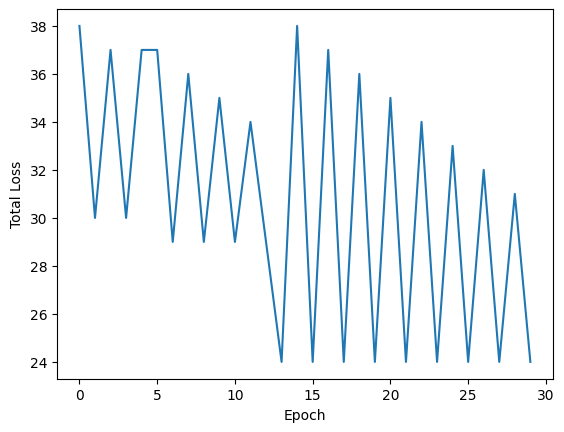

In [24]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

In [25]:
import numpy as np

def perceptron_algo(X, Y, eta=1, epochs=100): # Increased epochs for convergence
    w = np.zeros(len(X[0]))
    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += 1 # Count errors
                w = w + eta * X[i] * Y[i]
        if total_error == 0: # Stop if no errors
            break
    return w

X_and = np.array([
    [0, 0, -1],
    [0, 1, -1],
    [1, 0, -1],
    [1, 1, -1]
])

y_and = np.array([-1, -1, -1, 1])

w_and = perceptron_algo(X_and, y_and)
print("Learned weights for AND function:", w_and)

# Verify the learned weights
print("\nVerification of AND function classification:")
for i, x in enumerate(X_and):
    prediction = np.sign(np.dot(x, w_and))
    print(f"Input: {x[:2]}, Expected: {y_and[i]}, Predicted: {prediction}")

Learned weights for AND function: [3. 2. 4.]

Verification of AND function classification:
Input: [0 0], Expected: -1, Predicted: -1.0
Input: [0 1], Expected: -1, Predicted: -1.0
Input: [1 0], Expected: -1, Predicted: -1.0
Input: [1 1], Expected: 1, Predicted: 1.0


# **Question 2: Learnable Boolean Functions**

Extending to any boolean functions over a 2-bit binary input, there are indeed (2^2)^2 = 16 possible distinct boolean functions. A boolean function is learnable by a Perceptron if and only if it is linearly separable.

Among the 16 boolean functions of two inputs, the following are linearly separable and thus learnable by a Perceptron:

AND
OR
NAND
NOR
X1 (Output is 1 if X1 is 1, 0 otherwise)
X2 (Output is 1 if X2 is 1, 0 otherwise)
NOT X1 (Output is 1 if X1 is 0, 0 otherwise)
NOT X2 (Output is 1 if X2 is 0, 0 otherwise)
TRUE (Output is always 1)
FALSE (Output is always 0)
There are 10 linearly separable boolean functions.

The boolean functions that are not learnable by a Perceptron are those that are not linearly separable. These are:

XOR (Exclusive OR)
XNOR (Exclusive NOR)
Here are the truth tables for XOR and XNOR:

**XOR Truth Table:**

x1	x2	Output (y)

0 	0    	0 (-1)

0	  1	    1 (+1)

1  	0    	1 (+1)

1	  1   	0 (-1)

**XNOR Truth Table:**

x1	x2	Output (y)

0  	0	    1 (+1)

0	  1	    0 (-1)

1	  0	    0 (-1)

1	  1   	1 (+1)